In [1]:
import tweepy as tw
import numpy as np
import pandas as pd


In [2]:
from matplotlib import pyplot as plt
consumer_key = 'VFn1nswtl6INxSwOe8Yga1etf'
consumer_secret = 'SboqbU3rBdUyQjWs8aR8oOIpw8xWNwv7YWJeKkTwfXRw29UnpN'
access_token = '1564166585060691968-Y4OOUHu1owEJLQStW9bnXPRV4sO3PN'
access_token_secret = '0lT6A2OMxwiXQ96f2LBroY11jpjeyPsc5GwOBiaOtTxJa'


auth = tw.OAuthHandler(consumer_key, consumer_secret)
# Set Tokens
auth.set_access_token(access_token, access_token_secret)
# Instantiate API
api = tw.API(auth, wait_on_rate_limit=True)


In [3]:
a= str(input())



#itc


In [5]:
hashtag =a
query = tw.Cursor(api.search_tweets, q=hashtag).items(1000)
tweets = [{'Tweet':tweet.text, 'Timestamp':tweet.created_at} for tweet in query]
print(tweets)

[{'Tweet': 'RT @EagleEyeReview: Daily Update #28Apr2023 09:09\nStock : #ITC\nOPEN :412.2\nHIGH :417.4\nLOW :411\nCLOSE :416\nPreClose :412.25\nChange :3.75 (0…', 'Timestamp': datetime.datetime(2023, 4, 28, 3, 41, 3, tzinfo=datetime.timezone.utc)}, {'Tweet': 'Daily Update #28Apr2023 09:09\nStock : #ITC\nOPEN :412.2\nHIGH :417.4\nLOW :411\nCLOSE :416\nPreClose :412.25\nChange :3.7… https://t.co/3383eGj7YF', 'Timestamp': datetime.datetime(2023, 4, 28, 3, 39, 52, tzinfo=datetime.timezone.utc)}, {'Tweet': '#ITC $ITC Weekly Chart\n#SuperTrend suggests #Bullish trend\n#Support level at 389.07\n#SmoothedHeikenAshi suggests… https://t.co/COsiTp7fFj', 'Timestamp': datetime.datetime(2023, 4, 28, 3, 39, 22, tzinfo=datetime.timezone.utc)}, {'Tweet': '#ITC   marks #52-Week High. #BULLISH   https://t.co/uW3tqbfSfh https://t.co/4n8sHT8q7q', 'Timestamp': datetime.datetime(2023, 4, 28, 3, 27, 32, tzinfo=datetime.timezone.utc)}, {'Tweet': 'RT @Abhi4Research: After #ITC\n\nFew Largecaps on verge of breako

In [6]:
df = pd.DataFrame.from_dict(tweets)
df.head()


,Tweet,Timestamp
0,RT @EagleEyeReview: Daily Update #28Apr2023 09...,2023-04-28 03:41:03+00:00
1,Daily Update #28Apr2023 09:09\nStock : #ITC\nO...,2023-04-28 03:39:52+00:00
2,#ITC $ITC Weekly Chart\n#SuperTrend suggests #...,2023-04-28 03:39:22+00:00
3,#ITC marks #52-Week High. #BULLISH https:/...,2023-04-28 03:27:32+00:00
4,RT @Abhi4Research: After #ITC\n\nFew Largecaps...,2023-04-28 03:19:28+00:00


In [7]:
import nltk
from nltk.corpus import stopwords
import textblob
from textblob import Word, TextBlob


In [8]:
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')
custom_stopwords = ['RT', a]





[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
def preprocess_tweets(tweet, custom_stopwords):
    processed_tweet = tweet
    processed_tweet.replace('[^\w\s]', '')
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in stop_words)
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in custom_stopwords)
    processed_tweet = " ".join(Word(word).lemmatize() for word in processed_tweet.split())
    return(processed_tweet)


In [10]:
df['Processed Tweet'] = df['Tweet'].apply(lambda x: preprocess_tweets(x, custom_stopwords))
df.head()


,Tweet,Timestamp,Processed Tweet
0,RT @EagleEyeReview: Daily Update #28Apr2023 09...,2023-04-28 03:41:03+00:00,@EagleEyeReview: Daily Update #28Apr2023 09:09...
1,Daily Update #28Apr2023 09:09\nStock : #ITC\nO...,2023-04-28 03:39:52+00:00,Daily Update #28Apr2023 09:09 Stock : #ITC OPE...
2,#ITC $ITC Weekly Chart\n#SuperTrend suggests #...,2023-04-28 03:39:22+00:00,#ITC $ITC Weekly Chart #SuperTrend suggests #B...
3,#ITC marks #52-Week High. #BULLISH https:/...,2023-04-28 03:27:32+00:00,#ITC mark #52-Week High. #BULLISH https://t.co...
4,RT @Abhi4Research: After #ITC\n\nFew Largecaps...,2023-04-28 03:19:28+00:00,@Abhi4Research: After #ITC Few Largecaps verge...


In [11]:
print('Base review\n', df['Tweet'][0])
print('\n------------------------------------\n')
print('Cleaned and lemmatized review\n', df['Processed Tweet'][0])


Base review
 RT @EagleEyeReview: Daily Update #28Apr2023 09:09
Stock : #ITC
OPEN :412.2
HIGH :417.4
LOW :411
CLOSE :416
PreClose :412.25
Change :3.75 (0…

------------------------------------

Cleaned and lemmatized review
 @EagleEyeReview: Daily Update #28Apr2023 09:09 Stock : #ITC OPEN :412.2 HIGH :417.4 LOW :411 CLOSE :416 PreClose :412.25 Change :3.75 (0…


In [12]:
df['polarity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[0])
df['subjectivity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[1])
df[['Processed Tweet',  'polarity', 'subjectivity']].head()


,Processed Tweet,polarity,subjectivity
0,@EagleEyeReview: Daily Update #28Apr2023 09:09...,0.04,0.335
1,Daily Update #28Apr2023 09:09 Stock : #ITC OPE...,0.04,0.335
2,#ITC $ITC Weekly Chart #SuperTrend suggests #B...,0.00,0.000
3,#ITC mark #52-Week High. #BULLISH https://t.co...,0.16,0.540
4,@Abhi4Research: After #ITC Few Largecaps verge...,-0.10,0.050


In [13]:
lst1 =[]
lst2 =[]
lst3 =[]


for i in df['polarity'] :
    if i<0:
        lst1.append(i)
    elif i==0:
        lst2.append(i)
    elif i>0:
        lst3.append(i)
        
print("negative",lst1)
print("neutral",lst2)
print("positive",lst3)


negative [-0.1, -0.1, -0.1, -0.012500000000000011, -0.012500000000000011, -0.1, -0.012500000000000011, -0.012500000000000011, -0.012500000000000011, -0.1, -0.3333333333333333, -0.025, -0.1, -0.1, -0.1, -0.1, -0.13333333333333333, -0.0666666666666667, -0.0666666666666667, -0.5, -0.2, -0.05, -0.5, -0.05, -0.05, -0.05, -0.05, -0.05, -0.625, -0.625, -0.125, -0.022727272727272728, -0.022727272727272728, -0.5, -0.05, -0.07222222222222223, -0.08928571428571429, -0.055374149659863946, -0.1875, -0.1, -0.1, -0.09999999999999999, -0.09999999999999999, -0.1, -0.1, -0.2, -0.2, -0.013888888888888886, -0.125, -0.125, -0.19444444444444445, -0.1875, -0.3888888888888889, -0.05, -0.15, -0.3888888888888889, -0.05, -0.05, -0.20000000000000004, -0.05, -0.8, -0.8, -0.0875, -0.15]
neutral [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [14]:
neg = len(lst1)
neut= len(lst2)

pos = len(lst3)


print("Negative:",neg)
print("Positive",pos)


Negative: 64
Positive 331


In [15]:
from matplotlib import pyplot as plt
import numpy as np
 


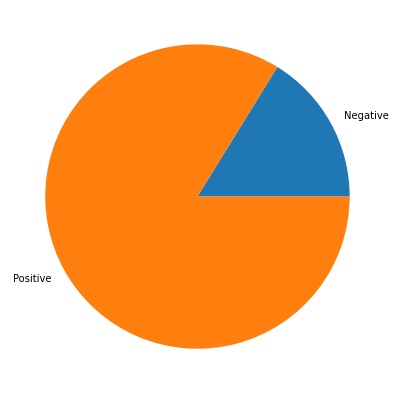

In [16]:
# Creating dataset
cars = ['Negative',  'Positive']
 
data = [len(lst1),len(lst3)]
 
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = cars)
 
# show plot
plt.show()


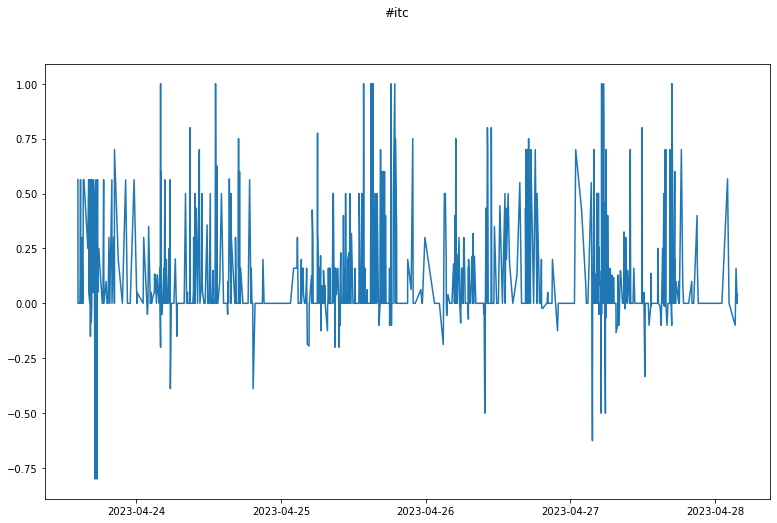

In [17]:
demo = 'blue'

f = plt.figure()
f.suptitle("\n".join([a]), y=0.98)
f.set_figwidth(13)
f.set_figheight(8)
plt.plot(df['Timestamp'], df['polarity'])
plt.show()


In [18]:
print(df['polarity'])

0      0.0400
1      0.0400
2      0.0000
3      0.1600
4     -0.1000
        ...  
995    0.0000
996    0.0000
997    0.0000
998    0.0000
999    0.5625
Name: polarity, Length: 1000, dtype: float64


In [19]:
val=df['polarity'].mean()
print(df['polarity'].mean())


0.10334555456832335
